<h1> Analyzing World Bank Projects Data</h1>
<p>As part of its commitment to <a href = 'http://www.worldbank.org/en/about'>'end extreme poverty and promote shared prosperity'</a>, The World Bank Group has been providing, since 1947, funding, advise, and technical support to developing countries to create projects that encourage social and economic growth.</p>
<p>The objective of this short analysis is to use JSON and Pandas to get an idea of the most common project themes and countries with the largest number of projects.</p>
<p>Resources: <a ref = 'http://www.worldbank.org/en/about'>http://www.worldbank.org/en/about</a></p>

<h2>Setting the Enviroment</h2>
<p>The first step is to import the libraries needed for the analysis</p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pretty print all output of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
from matplotlib import style
style.use('tableau-colorblind10')
from IPython.core.display import HTML, display
import folium

<h2>Getting the Data</h2>
<p>As mentioned above, the following analysis uses a small JSON file sample, saved locally, containing projects funded by The World Bank Group.</p>

In [4]:
# use context to open the file and load the data
%time
with open('world_bank_projects.json') as file:
    df = json.load(file)

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 12.2 µs


In [5]:
# confirm data was loaded and get a sense of the data structure.
type(df)
df[0]

list

{'sector': [{'Name': 'Primary education'},
  {'Name': 'Secondary education'},
  {'Name': 'Public administration- Other social services'},
  {'Name': 'Tertiary education'}],
 'supplementprojectflg': 'N',
 'projectfinancialtype': 'IDA',
 'prodline': 'PE',
 'mjtheme': ['Human development'],
 'idacommamt': 130000000,
 'impagency': 'MINISTRY OF EDUCATION',
 'project_name': 'Ethiopia General Education Quality Improvement Project II',
 'mjthemecode': '8,11',
 'closingdate': '2018-07-07T00:00:00Z',
 'totalcommamt': 130000000,
 'id': 'P129828',
 'mjsector_namecode': [{'code': 'EX', 'name': 'Education'},
  {'code': 'EX', 'name': 'Education'},
  {'code': 'BX', 'name': 'Public Administration, Law, and Justice'},
  {'code': 'EX', 'name': 'Education'}],
 'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
 'sector1': {'Percent': 46, 'Name': 'Primary education'},
 'lendinginstr': 'Investment Project Financing',
 'countrycode': 'ET',
 'sector2': {'Percent': 26

<h2>Data Preparation</h2>
<p>Since the data comes in a json format, we need to <em>normalize </em>it first to work with it in pandas.</p>

In [6]:
# use normalization to change the data structure into a flat table
df = json_normalize(df)

In [7]:
# confirm normalization
print(df.shape)

(500, 55)


In [8]:
# remove leading and trailing spaces from the column names 
df.columns = df.columns.str.strip('')

In [9]:
# rename and set the index
df.rename(columns = {'_id.$oid':'id_number'}, inplace = True)
df.set_index('id_number', inplace = True)

In [10]:
# subset the dataset to use only columns relevant to this analysis
wb = df.copy()[['countryname','countryshortname','mjtheme_namecode','mjtheme','regionname']]

# confirm the subset has the same number of rows
print(wb.shape)
wb.head(2)

(500, 5)


,countryname,countryshortname,mjtheme_namecode,mjtheme,regionname
id_number,,,,,
52b213b38594d8a2be17c780,Federal Democratic Republic of Ethiopia,Ethiopia,"[{'code': '8', 'name': 'Human development'}, {...",[Human development],Africa
52b213b38594d8a2be17c781,Republic of Tunisia,Tunisia,"[{'code': '1', 'name': 'Economic management'},...","[Economic management, Social protection and ri...",Middle East and North Africa


<h2>Analysis</h2>
<p>There are three main questions I am interested in answering:</p>
<ol>
    <li><b>Which are the 10 countries with the most projects?</b></li>
    <li><b>Which are the top 3 regions by number of projects?</b></li>
    <li><b>Which are the top 10 major project themes?</b></li>

<h3>1. Countries with Most Projects</h3>
<p>Based on the data, Indonesia and China, top the list of countries with the most number of projects, with 19 projects each. Through these projects, countries seek financial support and technical assistance from the World Bank to develop initiatives that encourage social, economic, or educational growth and awareness.<p>
<p>The top 10 countries were found as follows:</p>

In [11]:
#10 countries with most projects
wb['countryshortname'].value_counts().head(11)

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Nepal                 12
Bangladesh            12
Africa                11
Mozambique            11
Brazil                 9
Name: countryshortname, dtype: int64

<h4>Where are the Top 5 Countries by Number of Projects Located</h4>
<p>Using the folium package, we can see where the top 5 countries are located and the number of projects for each location.</p>

In [12]:
# Plot the top 5 countries with the most number of projects

# create the map
projects_map = folium.Map(zoom_start=2, location=[-1, 100])

# Top five countries by number of projects
top_5 = [
    {'loc': [39.916, 116.383], 'label': 'China: 19'},
    {'loc': [-6.175, 106.828], 'label': 'Indonesia: 19'},
    {'loc': [21.033, 105.85], 'label': 'Vietnam: 17'},
    {'loc': [28.613889, 77.208333], 'label':'India: 16'},
    {'loc':[15.348333, 44.206389], 'label':'Republic of Yemen: 13'}] 

# Adding the name of top 5 countries.
for project in top_5:
    _=folium.Marker(location=project['loc'], popup=project['label'])
    _.add_to(projects_map)
projects_map.save('projects_map.html')
display(projects_map)

<h3>2. Top 3 Regions by Number of Projects</h3>

Africa                     152
East Asia and Pacific      100
Europe and Central Asia     74
Name: regionname, dtype: int64

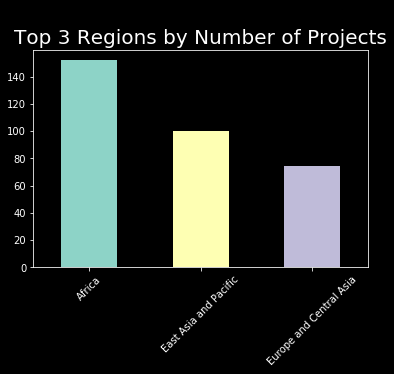

In [13]:
# regions with the most projects
wb['regionname'].value_counts().head(3)

# set style to display plot when using Jupyterlab's Dark Terminal Theme
plt.rcParams["figure.figsize"] = [14,8]
plt.style.use(['dark_background'])
_=wb['regionname'].value_counts().head(3).plot(kind = 'bar', rot = 45)
_=plt.title('\nTop 3 Regions by Number of Projects', fontsize = 20)

<h3>3. Most Common Project Themes</h3>
<p>Each project can have multiple themes that relate its goal and objectives. A project's theme allows to monitor the progress of a project and to recognize the most common areas where developing countries are looking to incentivate growth .</p>

<p>For this part of the analysis, we look at the <em>'mjtheme_namecode' </em>variable, which contains the codes and names of themes related to the project. As part of the data preparation:
    <ul>
        <li>a separate dataframe was created to <em>normalize</em> the data, since it contained a list of nested dictionaries with missing values</li>
        <li>missing theme names were filled in, based on the existing theme codes</li>
    </ul>
 </p> 

In [14]:
# looking at the structure of the column of interest
wb['mjtheme_namecode'].head(1)

id_number
52b213b38594d8a2be17c780    [{'code': '8', 'name': 'Human development'}, {...
Name: mjtheme_namecode, dtype: object

In [15]:
# normalize each dictionary inside the column and combine the resulting dataframes
%time
projects = pd.concat([(json_normalize(i)) for i in wb['mjtheme_namecode']])

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 20 µs


In [16]:
# change data type to save memory and speed up processing
projects = projects.astype('category')

In [17]:
# display top 10 theme code names
projects['code'].value_counts().head(10)

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

<p>Although we know what the top ten theme <em>codes</em> are, it would be more useful to know what those codes represent. In order to find the codes, we need to fill in the missing values first, so we can have an accurate count of names:</p>

In [18]:
# create a reference dictionary to fill in missing values

# create a copy of the projects DF with unique value
short = projects.copy().drop_duplicates()

# sort values to have only complete cases at the top
t = short.sort_values(by = 'name', ascending = False)[:11]

# create a list for the corresponding theme code and theme name
c = list(t['code'])
n = list(t['name'])

# create a dictionary to map codes with missing names
all_codes = dict(zip(c,n))

Create a dataframe with the missing names filled in.

In [19]:
# create a dataframe with the missing names filled in
%time
projects['theme_name'] = projects['code'].map(all_codes)

CPU times: user 8 µs, sys: 2 µs, total: 10 µs
Wall time: 17.9 µs


In [20]:
# confirm missing values are filled in correctly by checking existing data
projects.head()

,code,name,theme_name
0,8,Human development,Human development
1,11,,Environment and natural resources management
0,1,Economic management,Economic management
1,6,Social protection and risk management,Social protection and risk management
0,5,Trade and integration,Trade and integration


<p>Now that we filled in the missing values, we can look at what the codes represent.</p>
<p>The small sample we took, shows that <b>Enviromental and Natural Resources Management, Rural Development and Human Development </b>are the most common themes when it comes to developing projects.</p>

In [21]:
# top ten project themes
projects['theme_name'].value_counts().head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: theme_name, dtype: int64

<hr>
<h2>Accomplishments</h2>
<p>On the technical side, this analysis gave a small overview on how to read JSON files using the json library, how to use Pandas to normalize json files, extract raw information, handle missing values and analyze data, and how to use matplotlib and folium to visualize data.</p>
<p>Based on the data exploration we discovered that most projects are developed by countries in the western hemisphere and that these projects focus prmiarly on human capital and the environment.</p>